### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf

### Data Collection

In [2]:
dataset = sklearn.datasets.load_breast_cancer()

In [3]:
data = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)

In [4]:
data['label'] = dataset.target

In [5]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
data.shape

(569, 31)

In [7]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

### Data Analysis & Preprocessing

In [8]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [11]:
data['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [12]:
data.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [13]:
X = data.drop('label',axis = 1)
y = data.label

In [14]:
X.shape

(569, 30)

In [15]:
y.shape

(569,)

### Train_Test_Split

In [16]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,shuffle = True, stratify = y, random_state = 3)

In [17]:
x_train.shape

(455, 30)

In [18]:
y_train.shape

(455,)

In [19]:
x_test.shape

(114, 30)

In [20]:
y_test.shape

(114,)

### Building Custom Neural Network Model

In [21]:
tf.random.set_seed(5)

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (30,)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(30,activation = 'relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 30)               120       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,081
Trainable params: 1,021
Non-trainable params: 60
_________________________________________________________________


In [24]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

### Model Training

In [25]:
history = model.fit(x_train,y_train,validation_split = 0.1 ,epochs = 20 , verbose = 1)

Epoch 1/20
13/13 [==============================] - 3s 37ms/step - loss: 0.8574 - accuracy: 0.2787 - val_loss: 1.3904 - val_accuracy: 0.2609
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 0.5783 - accuracy: 0.7775 - val_loss: 1.8819 - val_accuracy: 0.3478
Epoch 3/20
13/13 [==============================] - 0s 11ms/step - loss: 0.4199 - accuracy: 0.9095 - val_loss: 2.0422 - val_accuracy: 0.3478
Epoch 4/20
13/13 [==============================] - 0s 11ms/step - loss: 0.3333 - accuracy: 0.9291 - val_loss: 1.9378 - val_accuracy: 0.3478
Epoch 5/20
13/13 [==============================] - 0s 12ms/step - loss: 0.2735 - accuracy: 0.9511 - val_loss: 1.7098 - val_accuracy: 0.3478
Epoch 6/20
13/13 [==============================] - 0s 11ms/step - loss: 0.2413 - accuracy: 0.9438 - val_loss: 1.5003 - val_accuracy: 0.3478
Epoch 7/20
13/13 [==============================] - 0s 11ms/step - loss: 0.2137 - accuracy: 0.9413 - val_loss: 1.2751 - val_accuracy: 0.3696
Epoch 8/20
13

### Model Evaluation

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

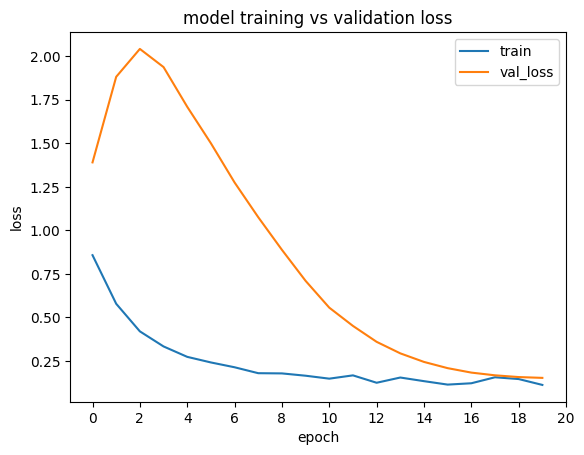

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model training vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(0, len(history.history['accuracy'])+1, 2))
plt.legend(['train','val_loss'])
plt.show()

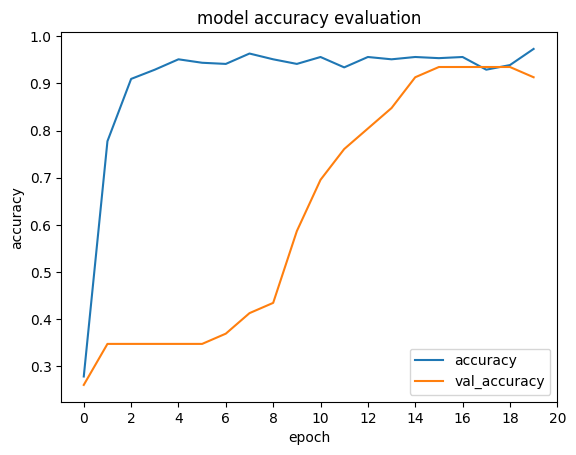

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy evaluation')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(range(0, len(history.history['accuracy'])+1, 2))
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [32]:
model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 5ms/step - loss: 0.2161 - accuracy: 0.8947


[0.2161487638950348, 0.8947368264198303]

In [40]:
y_pred = model.predict(x_test) # give the probabilities of label

4/4 [==============================] - 0s 6ms/step


In [44]:
y_pred[:4]

array([[0.08724163],
       [0.96028554],
       [0.9790734 ],
       [0.9875628 ]], dtype=float32)

In [45]:
y_test[:4]

94     0
308    1
151    1
226    1
Name: label, dtype: int32